In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import copy

In [22]:
X = 1
Y = 1
dx = 1e-2
dy = 1e-2
Nx = int(X / dx)
Ny = int(Y / dy)
Cx = 1 / (dx ** 2)
Cy = 1 / (dy ** 2)
D = - 2 / (dx ** 2) - 2 / (dy ** 2)
ax = (Nx - 1) * (Nx - 1)
ay = (Ny - 1) * (Nx - 1)
A = np.array([[0.0 for i in range(ax)] for y in range(ay)])
LPD = np.array([[0.0 for i in range(ax)] for y in range(ay)])
f = np.array([0.0 for i in range((Nx - 1) * (Ny - 1))])
test_f = np.array([0.0 for i in range((Nx - 1) * (Ny - 1))])
test_fa = np.array([0.0 for i in range((Nx - 1) * (Ny - 1))])
u = np.array([0.0 for i in range((Nx - 1) * (Ny - 1))])

for i in range(0, (Nx - 1) * (Ny - 1)):
    nx = i % (Nx - 1) + 1
    ny = i // (Nx - 1) + 1
    # print(nx, ny)
    x = nx * dx
    y = ny * dy
    # print("{:.1}" " {:.1}".format(x,y))
    f[i] = -32 * (x * (1 - x) + y * (1 - y))
    test_f[i] = math.sin(math.pi * x) * math.sin(math.pi * y)
    
# sparse matrix

for j in range(ay):
    A[j][j] = D
    LPD[j][j] = D
    if (j < ay - 1):
        A[j][j + 1] = Cx
    if (j > 0):
        A[j][j - 1] = Cx
        LPD[j][j - 1] = Cx
    if (j < ay - Nx):
        A[j][j + Nx] = Cy
    if (j > Nx - 1):
        A[j][j - Nx] = Cy
        LPD[j][j - Nx] = Cy

fa = A.dot(f)

In [19]:
import sys
np.set_printoptions(threshold=sys.maxsize)
# print(test_f)

In [7]:
# print(A)

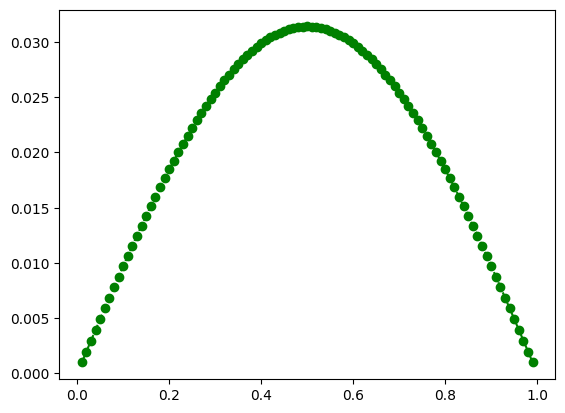

In [23]:
test_f1 = np.array([0.0 for i in range(Nx - 1)])
ys = Ny // 4
for i in range(0, Nx - 1):
    test_f1[i % (Nx - 1)] = test_f[i]
x = np.array([i * dx for i in range(1, Nx)])
plt.plot(x, test_f1, 'go', linestyle = '--')

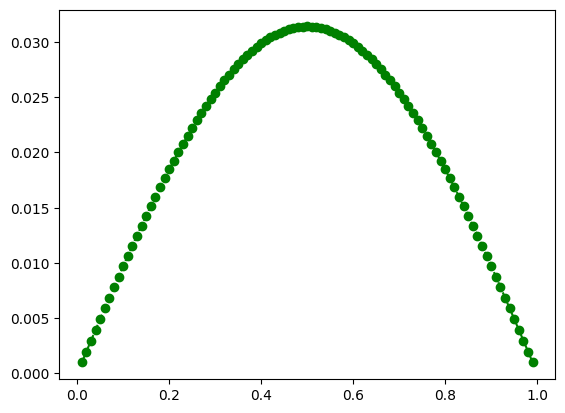

In [24]:
test_fa1 = np.array([0.0 for i in range(Nx - 1)])
ys = Ny // 4
for i in range(0, Nx - 1):
    test_fa1[i % (Nx - 1)] = test_f[i]
x = np.array([i * dx for i in range(1, Nx)])
plt.plot(x, test_fa1, 'go', linestyle = '--')

Text(0, 0.5, 'u')

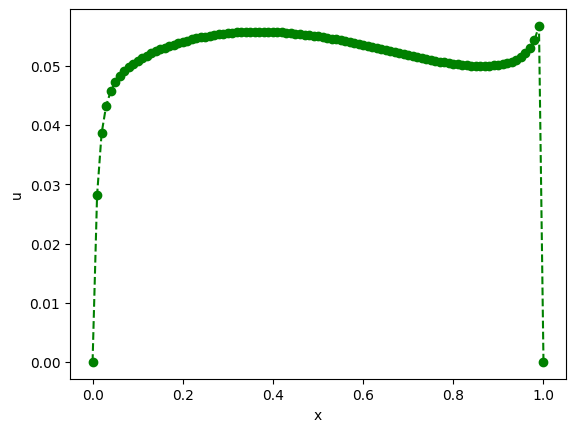

In [64]:
u = np.linalg.solve(A, f)
u1 = np.array([0.0 for i in range(Nx + 1)])
ys = 1
for i in range((ys - 1)* (Nx - 1), ys * (Nx - 1)):
    u1[i % (Nx - 1) + 1] = u[i]
x = np.array([i * dx for i in range(0, Nx + 1)])
plt.plot(x, u1, 'go', linestyle = '--')
plt.xlabel("x")
plt.ylabel("u")

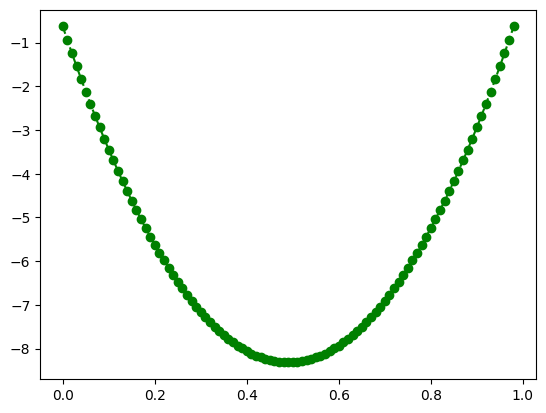

In [62]:
f1 = np.array([0.0 for i in range(Nx - 1)])
ys = 0
for i in range(0, Nx - 1):
    f1[i % (Nx - 1)] = f[i]
x = np.array([i * dx for i in range(0, Nx - 1)])
plt.plot(x, f1, 'go', linestyle = '--')

In [12]:
u0 = np.array([1.0 for i in range((Nx - 1) * (Ny - 1))])
r = np.array([0.0 for i in range((Nx - 1) * (Ny - 1))])
M = np.linalg.inv(LPD)

In [6]:
err = 1
while not err < 1e-6:
    r = f - A.dot(u0)
    u = u0 + M.dot(r)
    u0 = u
    err = np.linalg.norm(r)

Text(0, 0.5, 'u')

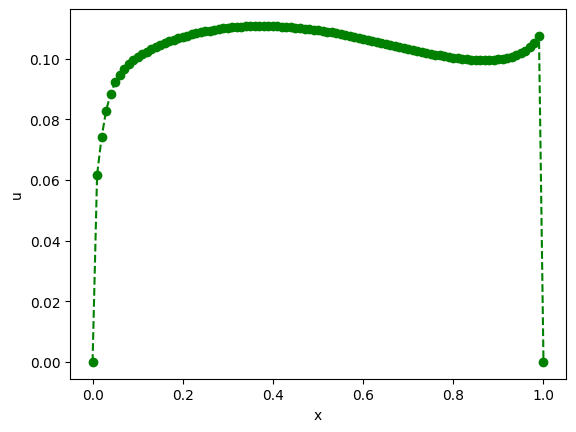

In [15]:
u1 = np.array([0.0 for i in range(Nx + 1)])
ys = 1
for i in range(ys * (Nx - 1), (ys + 1) * (Nx - 1)):
    u1[i % (Nx - 1) + 1] = u[i]
x = np.array([i * dx for i in range(0, Nx + 1)])
plt.plot(x, u1, 'go', linestyle = '--')
plt.xlabel("x")
plt.ylabel("u")